In [1]:
import os
count=0;
import cv2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
#from data import DataSet
import os.path
import matplotlib.pyplot as plt

In [2]:
train_path=r"E:\C Desktop\Company Tasks\Projects Assigned to me\Violence Detection system\Dataset\trainingImages"
test_path=r"E:\C Desktop\Company Tasks\Projects Assigned to me\Violence Detection system\Dataset\testimages"

Found 32492 images belonging to 2 classes.
Found 16604 images belonging to 2 classes.


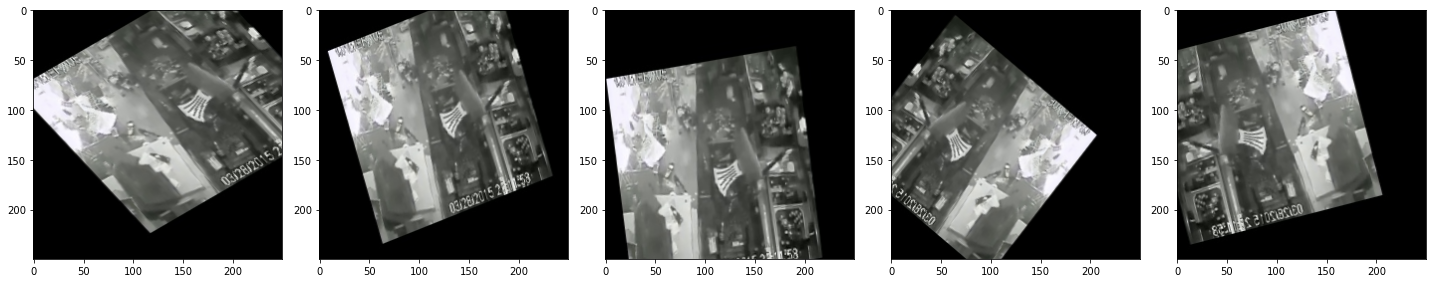

In [3]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
training_data =  training_datagen.flow_from_directory(train_path, 
                                      target_size=(250, 250), 
                                      batch_size=32,
                                      class_mode='binary')
 
training_data.class_indices
 
valid_datagen = ImageDataGenerator(rescale=1./255)
 
valid_data =  valid_datagen.flow_from_directory(test_path, 
                                      target_size=(250, 250), 
                                      batch_size=32,
                                      class_mode='binary')
 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [4]:
training_data.class_indices

{'Images of NViolence': 0, 'Images of Violence1': 1}

In [5]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
##
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.regularizers import l2

Using TensorFlow backend.


In [6]:
import tensorflow

In [7]:
cnn_model = tensorflow.keras.models.Sequential([
                                    tensorflow.keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[250, 250, 3],kernel_regularizer=l2(l=0.01)),
                                    
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=5),
                                   
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    tensorflow.keras.layers.Conv2D(filters=128, kernel_size=3),
                                    
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                          
                                    tensorflow.keras.layers.Conv2D(filters=256, kernel_size=3),
                                    
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                      
                                    tensorflow.keras.layers.Flatten(), # neural network building
                                    tensorflow.keras.layers.Dense(units=128, activation='relu'), # input layers
                                   
                                    tensorflow.keras.layers.Dropout(0.5),                                      
                                    tensorflow.keras.layers.Dense(units=256, activation='relu'),
                                    tensorflow.keras.layers.Dropout(0.5),                                      
                                    tensorflow.keras.layers.Dense(units=256, activation='relu'),
                                    tensorflow.keras.layers.Dropout(0.5),                                      
                                    tensorflow.keras.layers.Dense(units=256, activation='relu'),
                                                                   
                                    tensorflow.keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [8]:
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model_path = 'violenceandnonviolencenew.hp5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:
history = cnn_model.fit(training_data, 
                          epochs=7, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/7
1016/1016 [==============================] - ETA: 0s - loss: 0.4032 - accuracy: 0.8504
Epoch 00001: val_accuracy improved from -inf to 0.75211, saving model to violenceandnonviolencenew.hp5
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: violenceandnonviolencenew.hp5\assets
1016/1016 [==============================] - 3494s 3s/step - loss: 0.4032 - accuracy: 0.8504 - val_loss: 1.0736 - val_accuracy: 0.7521
Epoch 2/7
1016/1016 [==============================] - ETA: 0s - loss: 0.2336 - accuracy: 0.9391
Epoch 00002: val_accuracy did not improve from 0.75211
1016/1016 [==============================] - 3430s 3s/step - loss: 0.2336 - accuracy: 0.9391 - val_loss: 1.2948 - val_accuracy: 0.7177
Epoch 3/7
1016/1016 [==============================] - ETA: 0s - loss: 0

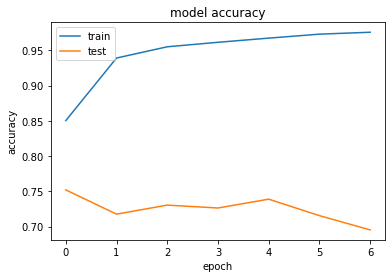

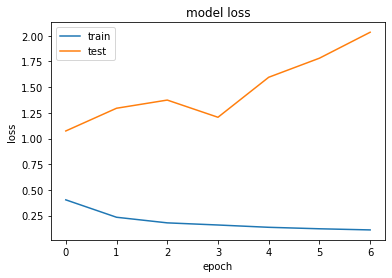

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Y_pred = cnn_model.predict_generator(valid_data)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_data.classes, y_pred))
print('Classification Report')

In [ ]:
target_names = ['Images of Non-Violence', 'Images of Violence']
print(classification_report(valid_data.classes, y_pred, target_names=target_names))

In [ ]:
cnn_model.save("new_model12.hp5")